To see if we can see yearly dynamics with the rqa metrics and temporal metrics we split the stack by year.

In [1]:
using Revise

┌ Info: Recompiling stale cache file /home/qe89hep/.julia/compiled/v0.7/Revise/M1Qoh.ji for Revise [295af30f-e4ad-537b-8983-00126c2a3abe]
└ @ Base loading.jl:1185


In [2]:
] activate rqa_paper_julia

In [3]:
include("rqa_paper_julia/recurrencequant.jl")
include("rqa_paper_julia/raster_utils.jl")

┌ Info: Recompiling stale cache file /home/qe89hep/.julia/compiled/v0.7/RecurrenceAnalysis/15lBl.ji for RecurrenceAnalysis [639c3291-70d9-5ea2-8c5b-839eba1ee399]
└ @ Base loading.jl:1185
┌ Warning: Deprecated syntax `multiple line breaks between doc string and object` at /home/qe89hep/.julia/packages/StatsBase/yNoh6/src/statmodels.jl:227.
│ Use `at most one line break` instead.
└ @ ~/.julia/packages/StatsBase/yNoh6/src/statmodels.jl:227
┌ Warning: Deprecated syntax `@doc call with ->` at /home/qe89hep/.julia/packages/RecurrenceAnalysis/HGgqW/src/rqa.jl:59.
│ Use `a line break` instead.
└ @ ~/.julia/packages/RecurrenceAnalysis/HGgqW/src/rqa.jl:59
┌ Info: Recompiling stale cache file /home/qe89hep/.julia/compiled/v0.7/ArchGDAL/MCIiB.ji for ArchGDAL [c9ce4bd3-c3d5-55b8-8973-c0e20141b8c3]
└ @ Base loading.jl:1185


getorbits (generic function with 1 method)

In [4]:
import StatsBase.quantile

In [5]:
using Dates
function prep_data(path, orb::String)
    arr = readasarray(path)
    bandnames = getbandnames(path)
    orbits = getorbits(bandnames)
    indices = find(x->x==orb,orbits)
    arr_small = remove_na(arr)
    arr_small = arr_small[:,indices]
end


function prep_data(path, metapath, startdate::Date, enddate::Date)
    arr = readasarray(path)
    #@show size(arr)
    bandnames = getbandnames(metapath)
    dates = getdates(bandnames)
    #@show dates
    indices = findall(x->startdate<=x<=enddate,dates)
    arr_small =remove_na(arr)
    arr_small = arr_small[:,indices]
end

function prep_data(path)
    arr = readasarray(path)
    #@show typeof(arr)
    remove_na(arr)
end

prep_data (generic function with 3 methods)

## Agricultural fields near the airport in Erfurt 
We start with the unfiltered original data for the year between october 2016 and october 2017. 
We know, that there was a deforestation somewhere in this time period on the change polygons. The other areas are either stable forest or stable agriculture.


In [6]:
datadir = "/media/data/claas_data/"
subfolder = "plots/"
paths_A_VH = ["S1_tile_1_timestack_VH_A___lin_Winterweizen",
         "S1_tile_1_timestack_VH_A___lin_Wintergerste",
         "S1_tile_1_timestack_VH_A___lin_Winterraps",
         "S1_tile_1_timestack_VH_A___lin_Sommergerste",
         "S1_tile_1_timestack_VH_A___lin_Winterdurum"]

paths_A_VV = ["S1_tile_1_timestack_VV_A___lin_Winterweizen",
         "S1_tile_1_timestack_VV_A___lin_Wintergerste",
         "S1_tile_1_timestack_VV_A___lin_Winterraps",
         "S1_tile_1_timestack_VV_A___lin_Sommergerste",
         "S1_tile_1_timestack_VV_A___lin_Winterdurum"]
paths_A_VV .= datadir .* subfolder .* paths_A_VV
paths_A_VH .= datadir .* subfolder .* paths_A_VH
testsite="Erfurt"
crop_list = ["Winterweizen" "Wintergerste" "Winterraps" "Sommergerste" "Winterdurum"]
jahr=2017
paths_A_VV

5-element Array{String,1}:
 "/media/data/claas_data/plots/S1_tile_1_timestack_VV_A___lin_Winterweizen"
 "/media/data/claas_data/plots/S1_tile_1_timestack_VV_A___lin_Wintergerste"
 "/media/data/claas_data/plots/S1_tile_1_timestack_VV_A___lin_Winterraps"  
 "/media/data/claas_data/plots/S1_tile_1_timestack_VV_A___lin_Sommergerste"
 "/media/data/claas_data/plots/S1_tile_1_timestack_VV_A___lin_Winterdurum" 

In [7]:
rmext(path) = splitext(path)[1]
stackpaths(dir) = map(x->joinpath(dir,x), rmext.(filter(x-> occursin(".hdr", x), readdir(dir))))

datdir = "/media/data/rqa_paper/"
plotsdir = joinpath(datdir, "plots")
refstacks = stackpaths(plotsdir)

12-element Array{String,1}:
 "/media/data/rqa_paper/plots/S1_tile_1_timestack_VH_A___lin_01_crops_ackerbohnen" 
 "/media/data/rqa_paper/plots/S1_tile_1_timestack_VH_A___lin_01_crops_sommergerste"
 "/media/data/rqa_paper/plots/S1_tile_1_timestack_VH_A___lin_01_crops_winterdurum" 
 "/media/data/rqa_paper/plots/S1_tile_1_timestack_VH_A___lin_01_crops_wintergerste"
 "/media/data/rqa_paper/plots/S1_tile_1_timestack_VH_A___lin_01_crops_winterraps"  
 "/media/data/rqa_paper/plots/S1_tile_1_timestack_VH_A___lin_01_crops_winterweizen"
 "/media/data/rqa_paper/plots/S1_tile_1_timestack_VH_A___lin_01_crops_zuckerrueben"
 "/media/data/rqa_paper/plots/S1_tile_1_timestack_VH_A___lin_airport"              
 "/media/data/rqa_paper/plots/S1_tile_1_timestack_VH_A___lin_laubwald"             
 "/media/data/rqa_paper/plots/S1_tile_1_timestack_VH_A___lin_mixed_forest"         
 "/media/data/rqa_paper/plots/S1_tile_1_timestack_VH_A___lin_nadelwald"            
 "/media/data/rqa_paper/plots/S1_tile_1_timestac

In [8]:
lastsplit(str, dlm) = String(split(str, dlm)[end])
crop_list = lastsplit.(basename.(refstacks), "_")


12-element Array{String,1}:
 "ackerbohnen" 
 "sommergerste"
 "winterdurum" 
 "wintergerste"
 "winterraps"  
 "winterweizen"
 "zuckerrueben"
 "airport"     
 "laubwald"    
 "forest"      
 "nadelwald"   
 "urban"       

In [ ]:
metapath = joinpath(datdir, "S1_tile_1_timestack_VH_A___lin")
arrs_2017_VH_A_ref = map(x->prep_data(x, metapath, Date(2017,1,1),Date(2017,12,31)), refstacks)

Start


┌ Warning: `find(A::AbstractArray)` is deprecated, use `(LinearIndices(A))[findall(A)]` instead.
│   caller = remove_na(::Array{Float64,3}, ::Int64) at raster_utils.jl:36
└ @ Main /home/qe89hep/Dokumente/papers_wip/rqa_paper/rqa_paper_julia/raster_utils.jl:36


Start
Start
Start
Start
Start
Start
Start


In [9]:
map(size, arrs_2017_VH_A_ref)

12-element Array{Tuple{Int64,Int64},1}:
 (8202, 119) 
 (17487, 119)
 (4378, 119) 
 (10333, 119)
 (31921, 119)
 (63420, 119)
 (8154, 119) 
 (29346, 119)
 (27224, 119)
 (26016, 119)
 (10282, 119)
 (58235, 119)

In [123]:
dates = getdates(metapath)
@show dates, year
ind = findall(x->Date(2017,1,1)<=x<Date(2017+1,1,1),dates)
dates_year = dates[ind]

(dates, year) = (Date[2014-10-13, 2014-10-20, 2014-10-25, 2014-11-13, 2014-11-25, 2014-11-30, 2014-12-12, 2014-12-31, 2015-01-05, 2015-01-12, 2015-01-17, 2015-01-29, 2015-02-05, 2015-02-10, 2015-02-17, 2015-02-22, 2015-03-01, 2015-03-06, 2015-03-13, 2015-03-18, 2015-03-25, 2015-03-30, 2015-04-06, 2015-04-11, 2015-04-18, 2015-04-23, 2015-04-30, 2015-05-05, 2015-05-12, 2015-05-17, 2015-05-24, 2015-05-29, 2015-06-05, 2015-06-10, 2015-06-17, 2015-06-22, 2015-06-29, 2015-07-04, 2015-07-16, 2015-07-23, 2015-07-28, 2015-08-04, 2015-08-09, 2015-08-16, 2015-08-21, 2015-08-28, 2015-09-02, 2015-09-09, 2015-09-14, 2015-09-21, 2015-09-26, 2015-10-08, 2015-10-15, 2015-10-20, 2015-10-27, 2015-11-01, 2015-11-20, 2015-11-25, 2015-12-02, 2015-12-07, 2015-12-14, 2015-12-19, 2015-12-26, 2016-01-07, 2016-01-12, 2016-01-19, 2016-01-24, 2016-01-31, 2016-02-05, 2016-02-12, 2016-02-17, 2016-02-24, 2016-02-29, 2016-03-07, 2016-03-12, 2016-03-19, 2016-03-24, 2016-03-31, 2016-04-12, 2016-04-17, 2016-04-24, 2016-0

119-element Array{Date,1}:
 2017-01-06
 2017-01-07
 2017-01-12
 2017-01-13
 2017-01-18
 2017-01-19
 2017-01-24
 2017-01-25
 2017-01-30
 2017-01-31
 2017-02-05
 2017-02-06
 2017-02-11
 ⋮         
 2017-11-26
 2017-11-27
 2017-12-02
 2017-12-03
 2017-12-08
 2017-12-09
 2017-12-14
 2017-12-15
 2017-12-20
 2017-12-21
 2017-12-26
 2017-12-27

In [15]:
#println(methods(readasarray))
#full_arr_vh = readasarray("/home/qe89hep/data/claas_erfurt/S1_tile_1_timestack_VH_A___lin")

In [12]:
#using ImageView
#imshow(full_arr_vh)

## Multitemporal Metrics
We have a look into Mean, standard deviation and the percentile 25.


┌ Info: Recompiling stale cache file /home/qe89hep/.julia/compiled/v0.7/Gadfly/DvECm.ji for Gadfly [c91e804a-d5a3-530f-b6f0-dfbca275c004]
└ @ Base loading.jl:1185


length(shift_dates) = 272
length(dates) = 272


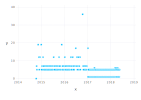

In [13]:
using Gadfly
include("rqa_paper_julia/raster_utils.jl")
path = datadir * "S1_tile_1_timestack_VH_A___lin"
#plotly()
isfile(path)
bandnames = getbandnames(path)
#dates= getdates(bandnames)
dates = getdates(path)

#sort!(dates)
shift_dates = [dates[1]; dates[1:end-1]]
@show length(shift_dates)
@show length(dates)
dates_dist = dates .- shift_dates
#@show dates_dist
#@show Int(dates_dist[5])
#dist = map(Int, dates_dist)
Gadfly.plot(x=dates,y=Dates.value.(dates_dist),Geom.point)

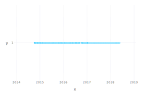

In [15]:
Gadfly.plot(x=dates,y=ones(length(dates)),Geom.point)dd

In [13]:
using Plots
using Statistics
pyplot()

Plots.PyPlotBackend()

In [91]:
plotlyjs()

┌ Info: Recompiling stale cache file /home/qe89hep/.julia/compiled/v0.7/PlotlyJS/1r9Ld.ji for PlotlyJS [f0f68f2c-4968-5e81-91da-67840de0976a]
└ @ Base loading.jl:1185


HTML{String}("    <script class='js-collapse-script'>\n        var curMatch =\n            window.location.href\n            .match(/(.*?)\\/notebooks\\/.*\\.ipynb/);\n\n        curMatch = curMatch ||\n            window.location.href\n            .match(/(.*?)\\/apps\\/.*\\.ipynb/);\n\n        if ( curMatch ) {\n            \$('head').append('<base href=\"' + curMatch[1] + '/\">');\n        }\n    </script>\n")

HTML{String}("<script class='js-collapse-script' src='/assetserver/5867f13802672e05ee3ab08ee1ba33a7dc6bb79a-assets/webio/dist/bundle.js'></script>")

HTML{String}("<script class='js-collapse-script' src='/assetserver/5867f13802672e05ee3ab08ee1ba33a7dc6bb79a-assets/providers/ijulia_setup.js'></script>")

HTML{String}("  <script class='js-collapse-script'>\n    \$('.js-collapse-script').parent('.output_subarea').css('padding', '0');\n  </script>\n")

┌ Warning: `using A: B` will only be allowed for single bindings, not modules. Use `using A.B` instead
│   caller = ip:0x0
└ @ Core :-1


Plots.PlotlyJSBackend()

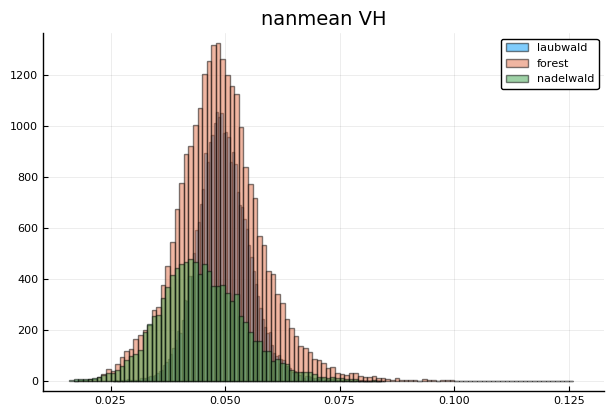

Add `using Statistics` to your imports.
  likely near /home/qe89hep/.julia/packages/IJulia/k5o7j/src/kernel.jl:38
Add `using Statistics` to your imports.
  likely near /home/qe89hep/.julia/packages/IJulia/k5o7j/src/kernel.jl:38
Add `using Statistics` to your imports.
  likely near /home/qe89hep/.julia/packages/IJulia/k5o7j/src/kernel.jl:38
Add `using Statistics` to your imports.
  likely near /home/qe89hep/.julia/packages/IJulia/k5o7j/src/kernel.jl:38
Add `using Statistics` to your imports.
  likely near /home/qe89hep/.julia/packages/IJulia/k5o7j/src/kernel.jl:38
Add `using Statistics` to your imports.
  likely near /home/qe89hep/.julia/packages/IJulia/k5o7j/src/kernel.jl:38
Add `using Statistics` to your imports.
  likely near /home/qe89hep/.julia/packages/IJulia/k5o7j/src/kernel.jl:38
Add `using Statistics` to your imports.
  likely near /home/qe89hep/.julia/packages/IJulia/k5o7j/src/kernel.jl:38
Add `using Statistics` to your imports.
  likely near /home/qe89hep/.julia/packages/IJul

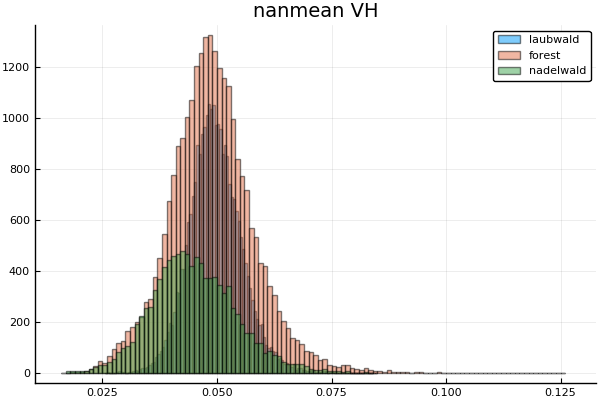

In [75]:
import Plots.histogram
nanmean(x) = mean(filter(!isnan,x))
func = nanmean
indstart = 8
indend = length(crop_list)-1
function histogram(data::AbstractArray, indstart::Integer, indend::Integer, func, labels::Vector{String})
    stats = [mapslices(func,arr,dims=[2]) for arr in data[indstart:indend]]
    #println([size(stat) for stat in stats])
    #println(count(x->isnan(x), stats[1]))#,mapslices(func, arr_change_2017, [2]),mapslices(func, arr_agri_2017, [2])]#, mapslices(func, arr_agri_asc,[2])]
    hist_plot = histogram(stats , opacity=0.5, title="$(func) VH", label=reshape(labels[indstart:indend],1,:))
    savefig(hist_plot, "/home/qe89hep/Dokumente/papers_wip/rqa_paper/figures/"*"S1_backscatter_$(func)_2017_$(indstart)_$(indend)")
    hist_plot
end
hist_plot=histogram(arrs_2017_VH_A_ref, 9, length(crop_list)-1, nanmean,crop_list)


In [69]:
"$(nanstd)"

"nanstd"

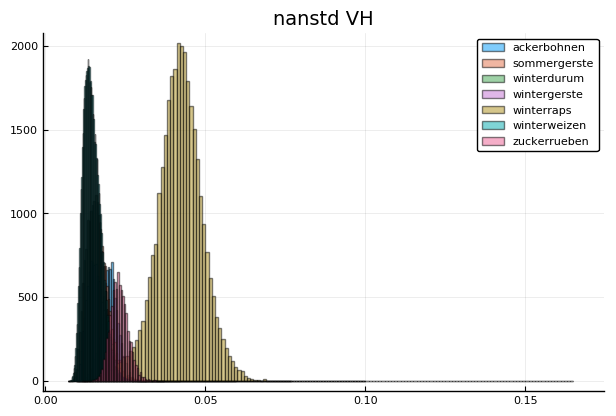

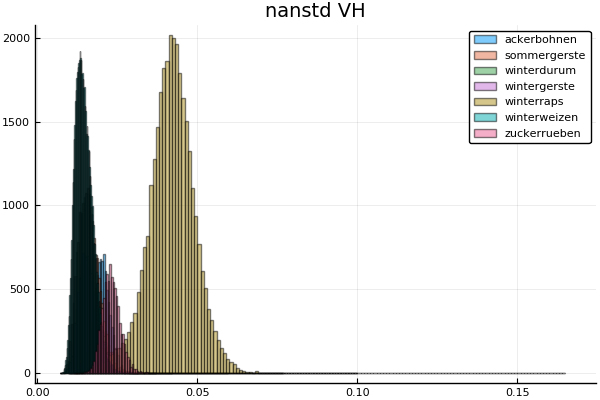

In [114]:
nanstd(x) = std(filter(!isnan,x))
histogram(arrs_2017_VH_A_ref, 1,7,nanstd, crop_list)

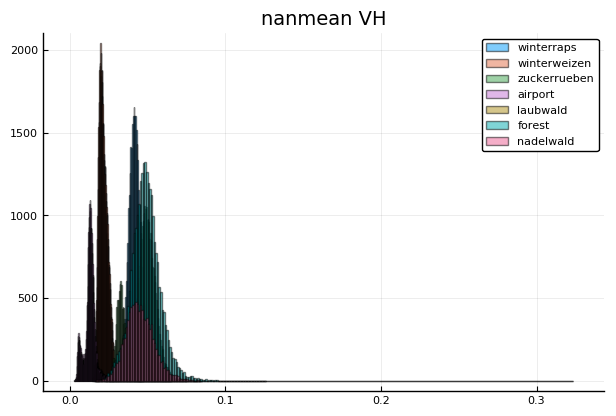

In [115]:
histogram(arrs_2017_VH_A_ref, 5,length(crop_list)-1, nanmean, crop_list);

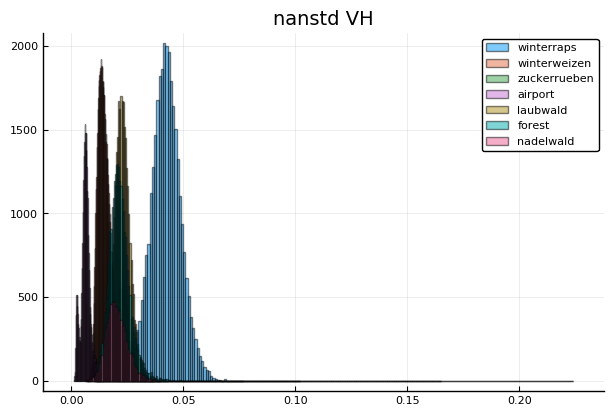

In [116]:
histogram(arrs_2017_VH_A_ref, 5,length(crop_list)-1, nanstd, crop_list);

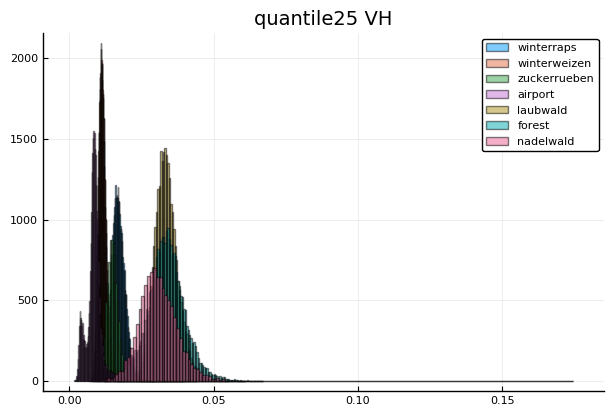

In [117]:
quantile25(x) = quantile(filter(!isnan,x),.25)
histogram(arrs_2017_VH_A_ref, 5,length(crop_list)-1, quantile25, crop_list);

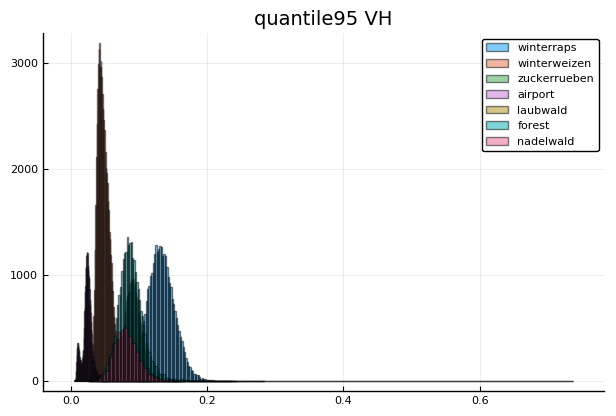

In [118]:
quantile95(x) = quantile(filter(!isnan,x),.95)
histogram(arrs_2017_VH_A_ref, 5,length(crop_list)-1, quantile95, crop_list);

What is the difference between winterraps and the other crops?
We can clearly distinguish between winterraps and all the other crops. 
The histogram of winter wheat looks so different because the sample size is much higher. 
How are the time series from the different crop types. 

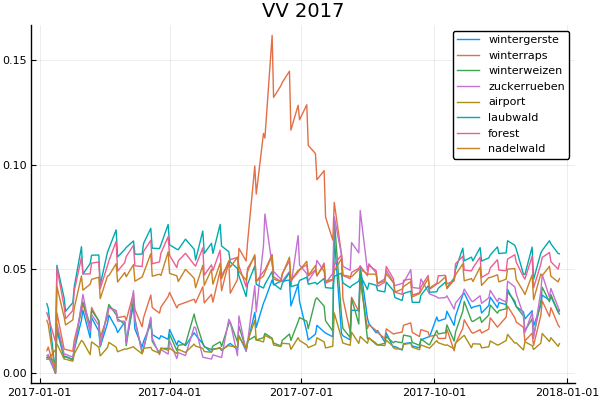

In [153]:
#plot(arr_ww[1:9,:]',color="red")
#plot!(arr_wg[1:9,:]',color="green")
#plot!(arr_wr[1:9,:]',color="blue")
#plot!(arr_wd[1:9,:]',color="cyan")
#plot!(arr_sg[1:9,:]',color="orange")
arr_labels = ["Winterweizen" "Wintergerste" "Sommergerste" "Winterraps" "Winterdurum"]
colors = ["Red", "blue", "cyan", "violet", "green"]
fig = Plots.plot(title="VV 2017")
function p05(x)
    if !all(isnan, x)
        StatsBase.quantile(filter(!isnan,x), .05)
    else
        NaN
    end
end

function p95(x)
    if !all(isnan, x)
        StatsBase.quantile(filter(!isnan,x), .95)
    else
        NaN
    end
end

indstart = 4
indend = 11
for (i,arr) in enumerate(arrs_2017_VH_A_ref[indstart:indend])
    #@show size(arr)
    temp_mean = mapslices(nanmean,arr, dims=[1])
    temp_p05 = mapslices(p05, arr, dims=[1])
    #@show size(temp_p05)
    temp_p95 = mapslices(p95, arr, dims=[1])
    plot!(dates_year, temp_mean[1,:], label=crop_list[indstart:indend][i])#,color = colors[i])
   # plot!(dates, temp_p95[1,:], opacity=0.5, color=colors[i], label=map(x->x*" Percentile 95", crop_list))
    #plot!(dates, temp_p05[1,:], opacity=0.5, color=colors[i], label=map(x->x*" Percentile 5", crop_list))
    
end
#temp_mean = mapslices(nanmean, arrs_2017_VH_A_ref[1], dims=[1])
#plot!(dates_year, temp_mean[1,:], label=labels)
fig


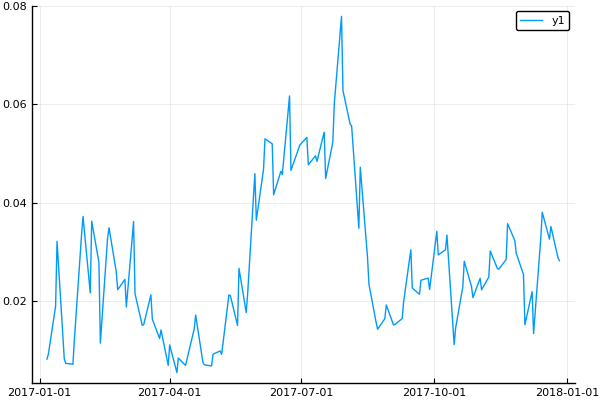

In [156]:
fig = Plots.plot(title="VV 2017")
temp_mean = mapslices(nanmean,arrs_2017_VH_A_ref[1], dims=[1])
plot(dates_year, temp_mean[1,:])

In [ ]:
arr = readasarray("data/"

In [47]:
savefig(fig, "figures/timeseries_crops_vv_2017.png")

┌ Warning: `mapslices(op, A::AbstractArray, dims)` is deprecated, use `mapslices(op, A, dims=dims)` instead.
│   caller = (::getfield(Main, Symbol("##87#88")))(::Array{Float64,2}) at none:0
└ @ Main ./none:0


Tuple{Int64,Int64}[(63420, 1), (10333, 1), (31921, 1), (17487, 1), (4378, 1)]
0


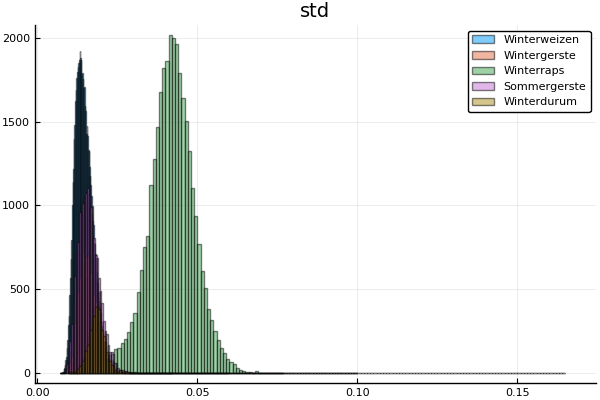

In [25]:
nanstd(x) = std(filter(!isnan,x))
func = nanstd
stats = [mapslices(func,arr,[2]) for arr in arrs_2017_A_VH]
println([size(stat) for stat in stats])
println(count(x->isnan(x), stats[1]))#,mapslices(func, arr_change_2017, [2]),mapslices(func, arr_agri_2017, [2])]#, mapslices(func, arr_agri_asc,[2])]
hist_plot = histogram(stats , opacity=0.5, title="std", label=crop_list)
#savefig(hist_plot, "/home/qe89hep/Dokumente/Sen4REDD/figures/"*testsite*"_S1_backscatter_Mean_"*year)

In [86]:
plot(mapslices(x->sorteddistances(x,1:100,0.01),arrs_2017_A_VH[1][100:110,:],[2]))

UndefVarError: UndefVarError: arrs_2017_A_VH not defined

In [105]:
methods(laminarity)

# 2 methods for generic function "laminarity":
[1] laminarity(vert_hist::Array{T,1} where T; kwargs...) in RecurrenceAnalysis at /home/qe89hep/.julia/packages/RecurrenceAnalysis/DOT92/src/rqa.jl:295
[2] laminarity(x::AbstractArray{T,2} where T; kwargs...) in RecurrenceAnalysis at /home/qe89hep/.julia/packages/RecurrenceAnalysis/DOT92/src/rqa.jl:296

In [ ]:
recs_VH = map(spatial_rec, arrs_2017_VH_A_ref)

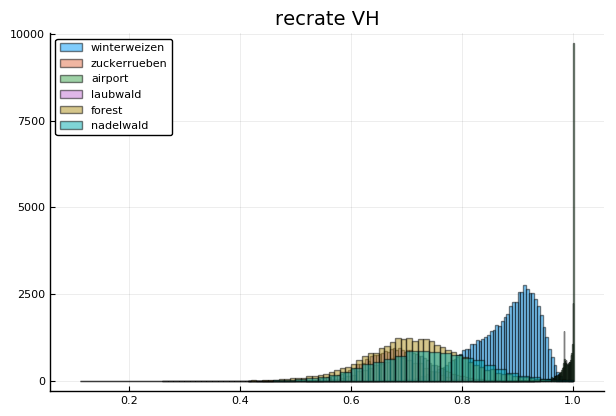

In [112]:
recrate(x) = x[1,:]
histogram(recs_VH, 6,length(crop_list)-1, recrate, crop_list);

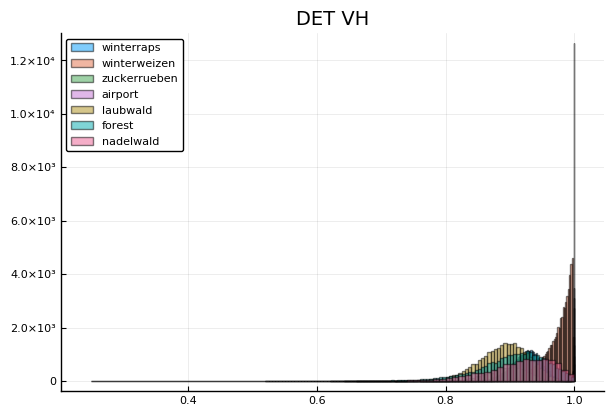

In [113]:
DET(x) = x[2,:]
histogram(recs_VH, 5,length(crop_list)-1, DET, crop_list);

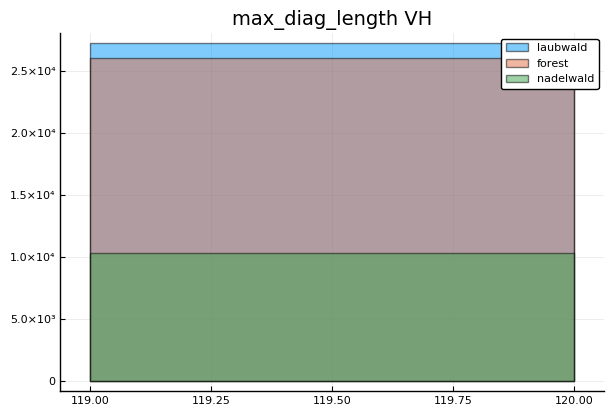

In [101]:
max_diag_length(x) = x[4,:]
histogram(recs_VH, 9,length(crop_list)-1, max_diag_length, crop_list);

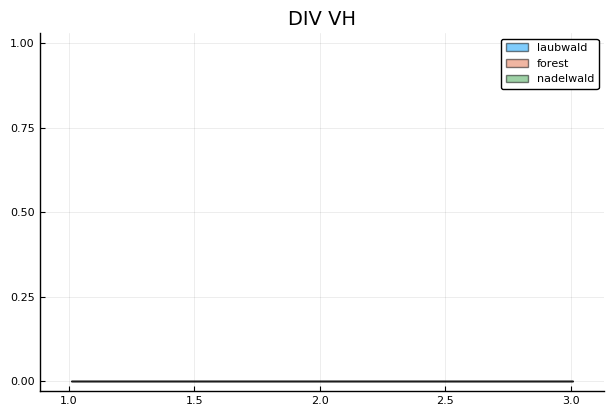

In [102]:
DIV(x) = x[5,:]
histogram(recs_VH, 9,length(crop_list)-1, DIV, crop_list);

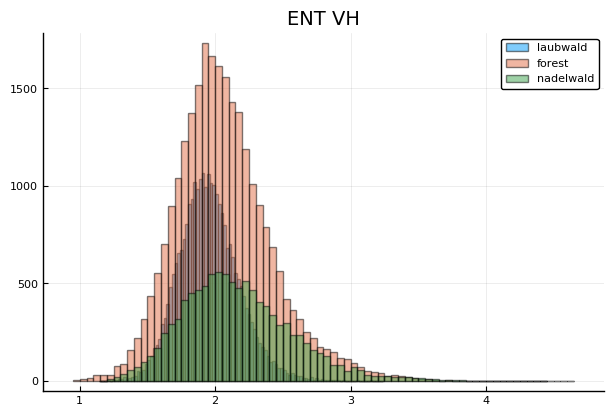

In [103]:
ENT(x) = x[6,:]
histogram(recs_VH, 9,length(crop_list)-1, ENT, crop_list);

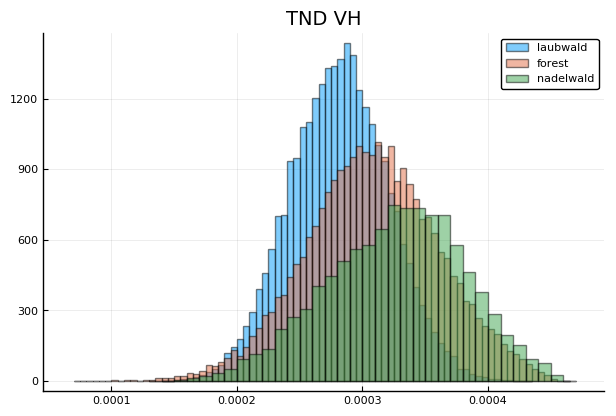

In [107]:
TND(x) = x[7,:]
histogram(recs_VH, 9,length(crop_list)-1, TND, crop_list);

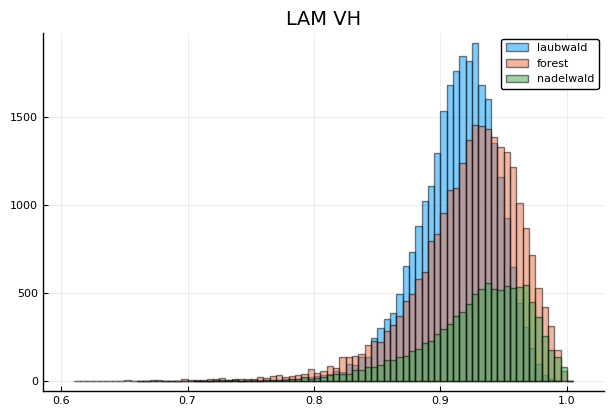

In [108]:
LAM(x) = x[8,:]
histogram(recs_VH, 9,length(crop_list)-1, LAM, crop_list);

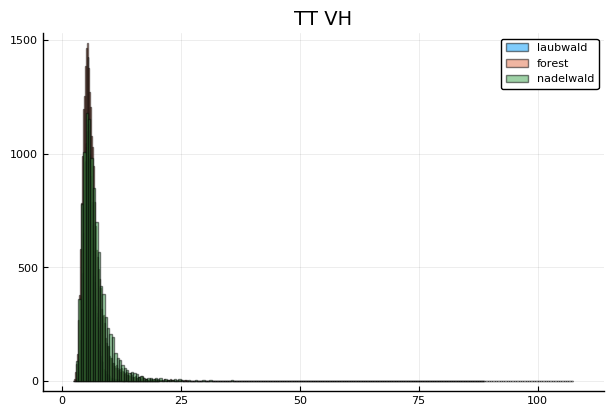

In [110]:
TT(x) = x[9,:]
histogram(recs_VH, 9,length(crop_list)-1, TT, crop_list);

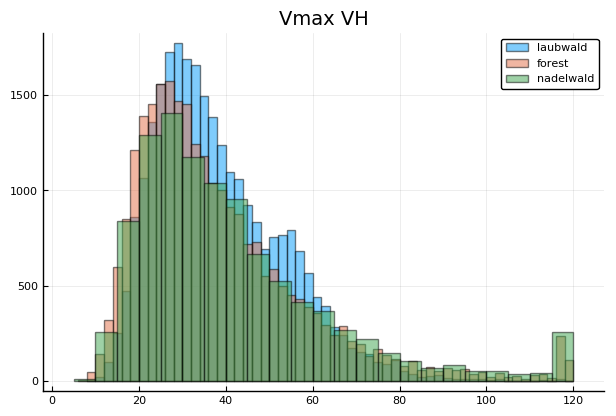

In [111]:
Vmax(x) = x[10,:]
histogram(recs_VH, 9,length(crop_list)-1, Vmax, crop_list);

In [92]:
?rqa

search: rqa firstdayofquarter



```
rqa(x; <keyword arguments>)
```

Calculate RQA parameters of a recurrence matrix. See the functions `recurrencerate`, `determinism`, `avgdiag`, `maxdiag`, `divergence`, `entropy`, `trend`, `laminarity`, `trappingtime` and `maxvert` for the definition of the different parameters and the default values of the arguments.

The keyword arguments `theilerdiag`, `lmindiag` may be used to declare specific values that override the values of `theiler` and `lmin` in the calculation of parameters related to diagonal structures. Likewise, `theilervert` and `lminvert` can be used for the calculation of parameters related to vertical structures.

The returned value is a dictionary with the following keys:

  * "RR": recurrence rate (see `recurrencerate`)
  * "DET": determinsm (see `determinism`)
  * "L": average length of diagonal structures (see `avgdiag`)
  * "Lmax": maximum length of diagonal structures (see `maxdiag`)
  * "DIV": divergence (see `divergence`)
  * "ENT": entropy of diagonal structures (see `entropy`)
  * "TND": trend of recurrences (see `trend`)
  * "LAM": laminarity (see `laminarity`)
  * "TT": trapping time (see `trappingtime`)
  * "Vmax": maximum length of vertical structures (`see`maxvert`)

The keyword argument `onlydiagonal` (`false` by default) can be set to `true` in order to restrict the analysis to the recurrence rate and the parameters related to diagonal structures ("RR", "DET", "L", "Lmax", "DIV" and "ENT").


In [32]:
recs_VV = map(spatial_rec, arrs_2017_A_VV)

(63420, 10)
(10333, 10)
(31921, 10)
(17487, 10)
(4378, 10)


5-element Array{Array{Float64,2},1}:
 [0.0809971 0.134241 … 2.11111 5.0; 0.0822682 0.124283 … 2.12037 3.0; … ; 0.191583 0.380108 … 2.52941 7.0; 0.171245 0.296618 … 2.28785 5.0]
 [0.172375 0.322136 … 2.2897 6.0; 0.140456 0.227807 … 2.24332 4.0; … ; 0.0992162 0.172628 … 2.23256 4.0; 0.0980863 0.225197 … 2.14737 4.0] 
 [0.121107 0.18797 … 2.35349 4.0; 0.126757 0.252983 … 2.64319 5.0; … ; 0.0884825 0.195767 … 2.39759 5.0; 0.0913071 0.192504 … 2.13699 4.0] 
 [0.103029 0.179104 … 2.04819 4.0; 0.117012 0.20026 … 2.05952 3.0; … ; 0.107125 0.160229 … 2.20213 4.0; 0.111503 0.228767 … 2.46667 4.0]   
 [0.0893298 0.219895 … 2.1165 3.0; 0.104018 0.212703 … 2.26941 4.0; … ; 0.0838218 0.191011 … 2.31034 3.0; 0.115317 0.200793 … 2.08377 3.0] 

In [33]:
i=1
stats = [rec[:,i] for rec in recs_VH]
hist_plot = histogram(stats , opacity=0.5, title="Recurrence Rate", label=crop_list)
#savefig(hist_plot, "/home/qe89hep/Dokumente/Sen4REDD/figures/"*testsite*"_S1_backscatter_rqa_det_"*year)

In [34]:
i=1
stats = [rec[:,i] for rec in recs_VV]
hist_plot = histogram(stats , opacity=0.5, title="Recurrence Rate", label=crop_list)
#savefig(hist_plot, "/home/qe89hep/Dokumente/Sen4REDD/figures/"*testsite*"_S1_backscatter_rqa_det_"*year)

In [35]:
i=2
stats = [rec[:,i] for rec in recs_VV]
hist_plot = histogram(stats , opacity=0.5, title="Determinism 2017", label=label=["Winterweizen" "Wintergerste" "Sommergerste" "Winterraps" "Winterdurum"])
#savefig(hist_plot, "/home/qe89hep/Dokumente/Sen4REDD/figures/"*testsite*"_S1_backscatter_rqa_det_"*year)

In [36]:
i=2
stats = [rec[:,i] for rec in recs_VH]
hist_plot = histogram(stats , opacity=0.5, title="Determinism 2017", label=label=["Winterweizen" "Wintergerste" "Sommergerste" "Winterraps" "Winterdurum"])
#savefig(hist_plot, "/home/qe89hep/Dokumente/Sen4REDD/figures/"*testsite*"_S1_backscatter_rqa_det_"*year)

In [38]:
i=8
stats = [rec[:,i] for rec in recs_VV]
hist_plot = histogram(stats , opacity=0.5, title="Laminarity 2017 VV", label=crop_list)
#savefig(hist_plot, "/home/qe89hep/Dokumente/Sen4REDD/figures/"*testsite*"_S1_backscatter_rqa_lam_"*year)

In [39]:
i=8
stats = [rec[:,i] for rec in recs_VH]
hist_plot = histogram(stats , opacity=0.5, title="Laminarity 2017 VH", label=crop_list)
#savefig(hist_plot, "/home/qe89hep/Dokumente/Sen4REDD/figures/"*testsite*"_S1_backscatter_rqa_lam_"*year)

# Hidalgo


In [28]:
path_for = "/home/qe89hep/data/temp/S1_Hidalgo_timestack_VV_lin_forest_092016_102017"
path_agri = "/home/qe89hep/data/temp/S1_Hidalgo_timestack_VV_lin_agriculture_092016_102017"
path_change = "/home/qe89hep/data/temp/S1_Hidalgo_timestack_VV_lin_change_092016_102017"
testsite="Hidalgo"
year="2017"

"2017"

In [30]:
#arr_for_2015 = prep_data(path_for, Date(2014,9), Date(2015,10))
#arr_for_2016 = prep_data(path_for, Date(2015,9), Date(2016,10))
arr_for_2017 = prep_data(path_for,path_for, Date(2016,10),Date(2017,10))

#arr_change_2015 = prep_data(path_for, Date(2014,9), Date(2015,10))
#arr_change_2016 = prep_data(path_for, Date(2015,9), Date(2016,10))
arr_change_2017 = prep_data(path_change,path_change, Date(2016,10),Date(2017,10))

#arr_agri_2015 = prep_data(path_for, Date(2014,9), Date(2015,10))
#arr_agri_2016 = prep_data(path_for, Date(2015,9), Date(2016,10))
arr_agri_2017 = prep_data(path_agri, path_change, Date(2016,10),Date(2017,10));

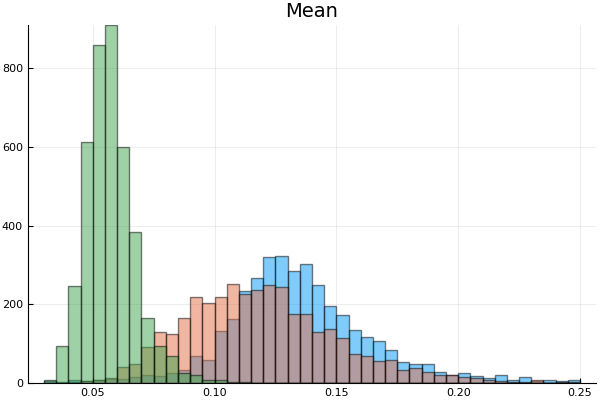

In [31]:
func = mean
stats = [mapslices(func,arr_for_2017,[2]),mapslices(func, arr_change_2017, [2]),mapslices(func, arr_agri_2017, [2])]#, mapslices(func, arr_agri_asc,[2])]
hist_plot = histogram(stats , opacity=0.5, title="Mean", label="",nbins = 0.03:0.005:0.25)
#savefig(hist_plot, "/home/qe89hep/Dokumente/Sen4REDD/figures/"*testsite*"_S1_backscatter_temp_mean_"*year)

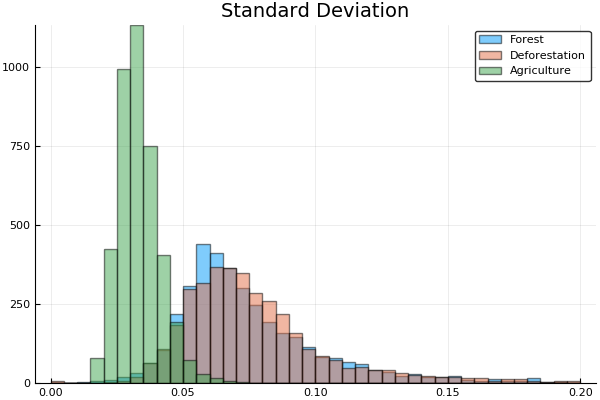

In [32]:
func = std
stats = [mapslices(func,arr_for_2017,[2]),mapslices(func, arr_change_2017, [2]),mapslices(func, arr_agri_2017, [2])]#, mapslices(func, arr_agri_asc,[2])]
hist_plot = histogram(stats , opacity=0.5, title="Standard Deviation", label=["Forest" "Deforestation" "Agriculture"],nbins = 0.0:0.005:0.2)
#savefig(hist_plot, "/home/qe89hep/Dokumente/Sen4REDD/figures/"*testsite*"_S1_backscatter_temp_std_"*year)

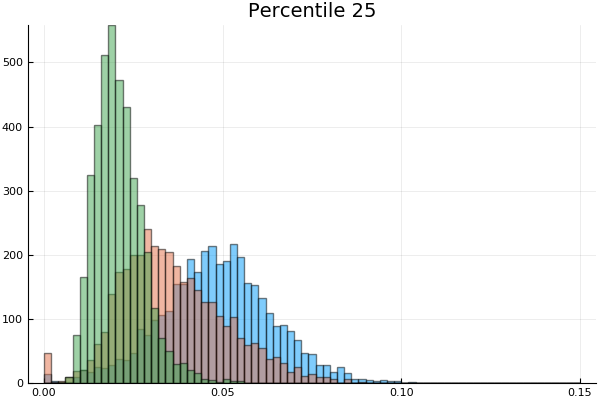

In [33]:
func = x ->quantile(x,.05)
stats = [mapslices(func,arr_for_2017,[2]),mapslices(func, arr_change_2017, [2]),mapslices(func, arr_agri_2017, [2])]#, mapslices(func, arr_agri_asc,[2])]
hist_plot = histogram(stats , opacity=0.5, title="Percentile 25", label="",nbins=0.0:0.002:0.15)
#savefig(hist_plot, "/home/qe89hep/Dokumente/Sen4REDD/figures/"*testsite*"_S1_backscatter_perc25_"*year)

(3757, 10)
(3703, 10)
(4117, 10)


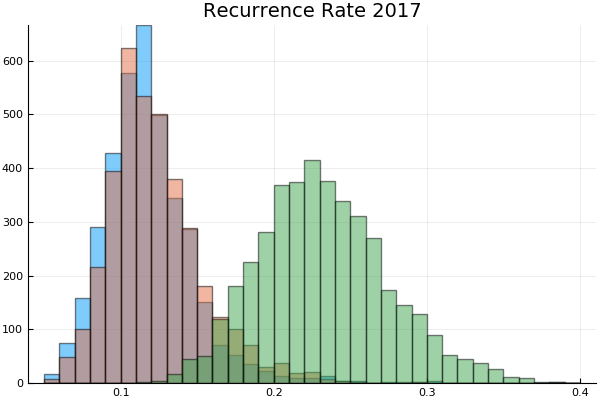

In [34]:
i=1
stats = [spatial_rec(arr_for_2017)[:,i],spatial_rec(arr_change_2017)[:,i],spatial_rec(arr_agri_2017)[:,i]]
hist_plot = histogram(stats , opacity=0.5, title="Recurrence Rate 2017", label="",nbins=0.05:0.01:0.4)
#savefig(hist_plot, "/home/qe89hep/Dokumente/Sen4REDD/figures/"*testsite*"_S1_backscatter_rqa_rr_"*year)

(1296, 10)
(935, 10)
(546, 10)


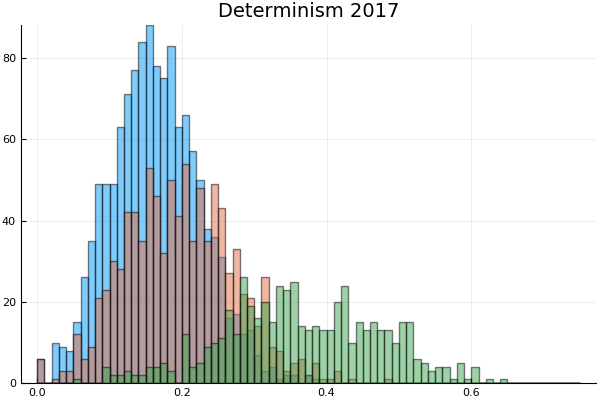

In [23]:
#pyplot()
i=2
stats = [spatial_rec(arr_for_2017)[:,i],spatial_rec(arr_change_2017)[:,i],spatial_rec(arr_agri_2017)[:,i]]
hist_plot = histogram(stats , opacity=0.5, title="Determinism 2017", label="",nbins=0:0.01:0.75)
#savefig(hist_plot, "/home/qe89hep/Dokumente/Sen4REDD/figures/"*testsite*"_S1_backscatter_rqa_det_"*year)

(1296, 10)
(935, 10)
(546, 10)


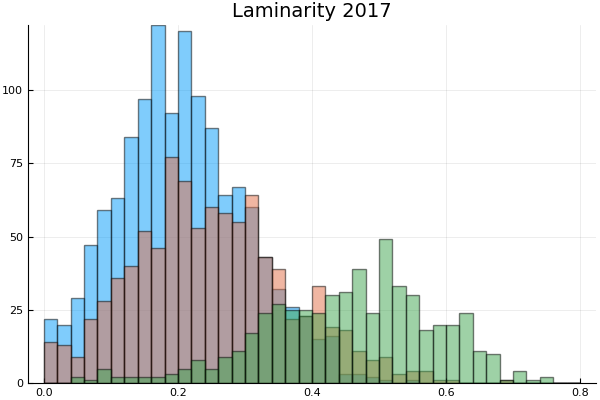

In [24]:
i=8
stats = [spatial_rec(arr_for_2017)[:,i],spatial_rec(arr_change_2017)[:,i],spatial_rec(arr_agri_2017)[:,i]]
hist_plot = histogram(stats , opacity=0.5, title="Laminarity 2017", label="",nbins=0:0.02:0.8)
#savefig(hist_plot, "/home/qe89hep/Dokumente/Sen4REDD/figures/"*testsite*"_S1_backscatter_rqa_lam_"*year)

# Start of other stuff that should be tidied up.

In [101]:
func = x->mean([quantile(x,0.25), quantile(x,0.75)])
stats = [mapslices(func,arr_for_2017,[2]),mapslices(func, arr_change_2017, [2]),mapslices(func, arr_agri_2017, [2])]#, mapslices(func, arr_agri_asc,[2])]
histogram(stats , opacity=0.5, title="Midhinge", label=["Forest" "Deforestation" "Agriculture"],nbins=0:0.005:0.25)

In [40]:
function mva(x)
    R = Array{Float64, 2}(length(x),length(x))
    for i in 1:length(x), j in 1:length(x)
        R[i,j]=maximum([x[i]/x[j], x[j]/x[i]])
    end
    #@show R
    y =0
    for i in 1:length(x)-1, j=1:i+1
        y+=R[i,j]
    end
    #@show y
    10 * log.(2/((length(x)*(length(x)-1)))*y)
end

mva (generic function with 1 method)

In [41]:
mva([1,2,3])

9.162907318741551

In [48]:
func = mva
stats = [mapslices(func,arr_for_2017,[2]),mapslices(func, arr_change_2017, [2]),mapslices(func, arr_agri_2017, [2])]#, mapslices(func, arr_agri_asc,[2])]
histogram(stats , opacity=0.5, title="Mean annual variability", label=["Forest" "Deforestation" "Agriculture"],nbins = 3:0.2:15)

In [56]:
#band_names = getbandnames(path_for)
arr_for_asc = prep_data(path_for, "A")
arr_for_desc = prep_data(path_for, "D")
arr_change_asc = prep_data(path_change, "A")
arr_change_desc = prep_data(path_change, "D")
arr_agri_asc = prep_data(path_agri, "A")
arr_agri_desc = prep_data(path_agri, "D");

In [59]:
func = mean
stats = [mapslices(func, arr_for_asc, [2]),mapslices(func, arr_change_asc, [2]), mapslices(func, arr_agri_asc,[2])]
histogram(stats , opacity=0.5, title="Mean Ascending", label=["Forest" "Deforestation" "Agriculture"])

In [22]:
func = mean
stats = [mapslices(func,arr_change_2015,[2]),mapslices(func, arr_change_2016, [2]),mapslices(func, arr_change_2017, [2])]#, mapslices(func, arr_agri_asc,[2])]
histogram(stats , opacity=0.5, title="Mean Deforestation", label=["2015" "2016" "2017"])

In [33]:
i=1
stats = [spatial_rec(arr_change_2015)[:,i],spatial_rec(arr_change_2016)[:,i],spatial_rec(arr_change_2017)[:,i]]
histogram(stats , opacity=0.5, title="Recurrence Rate Deforestation", label=["2015" "2016" "2017"])

(3757, 10)
(3757, 10)
(3757, 10)


In [34]:
i=2
stats = [spatial_rec(arr_change_2015)[:,i],spatial_rec(arr_change_2016)[:,i],spatial_rec(arr_change_2017)[:,i]]
histogram(stats , opacity=0.5, title="Determinism Deforestation", label=["2015" "2016" "2017"])

(3757, 10)
(3757, 10)
(3757, 10)


In [120]:
func = x->mean([quantile(x,0.25), quantile(x,0.75)])
stats = [mapslices(func,arr_for_2017,[2]),mapslices(func, arr_change_2017, [2]),mapslices(func, arr_agri_2017, [2])]#, mapslices(func, arr_agri_asc,[2])]
histogram(stats , opacity=0.5, title="Midhinge", label=["Forest" "Deforestation" "Agriculture"],nbins=0:0.005:0.3)

In [35]:
i=3
stats = [spatial_rec(arr_change_2015)[:,i],spatial_rec(arr_change_2016)[:,i],spatial_rec(arr_change_2017)[:,i]]
histogram(stats , opacity=0.5, title="Avg. Diagonal Deforestation", label=["2015" "2016" "2017"])

(3757, 10)
(3757, 10)
(3757, 10)


In [44]:
i=4
stats = [spatial_rec(arr_change_2015)[:,i],spatial_rec(arr_change_2016)[:,i],spatial_rec(arr_change_2017)[:,i]]
histogram(stats ,nbins=20, opacity=0.5, title="Longest Diagonal Deforestation", label=["2015" "2016" "2017"])

(3757, 10)
(3757, 10)
(3757, 10)


In [37]:
i=5
stats = [spatial_rec(arr_change_2015)[:,i],spatial_rec(arr_change_2016)[:,i],spatial_rec(arr_change_2017)[:,i]]
histogram(stats , opacity=0.5, title="Divergence Deforestation", label=["2015" "2016" "2017"])

(3757, 10)
(3757, 10)
(3757, 10)


In [38]:
i=6
stats = [spatial_rec(arr_change_2015)[:,i],spatial_rec(arr_change_2016)[:,i],spatial_rec(arr_change_2017)[:,i]]
histogram(stats , opacity=0.5, title="Entropy Deforestation", label=["2015" "2016" "2017"])

(3757, 10)
(3757, 10)
(3757, 10)


In [39]:
i=7
stats = [spatial_rec(arr_change_2015)[:,i],spatial_rec(arr_change_2016)[:,i],spatial_rec(arr_change_2017)[:,i]]
histogram(stats , opacity=0.5, title="Trend Deforestation", label=["2015" "2016" "2017"])

(3757, 10)
(3757, 10)
(3757, 10)


In [40]:
i=8
stats = [spatial_rec(arr_change_2015)[:,i],spatial_rec(arr_change_2016)[:,i],spatial_rec(arr_change_2017)[:,i]]
histogram(stats , opacity=0.5, title="Laminarity Deforestation", label=["2015" "2016" "2017"])

(3757, 10)
(3757, 10)
(3757, 10)


In [41]:
i=9
stats = [spatial_rec(arr_change_2015)[:,i],spatial_rec(arr_change_2016)[:,i],spatial_rec(arr_change_2017)[:,i]]
histogram(stats , opacity=0.5, title="Trapping Time Deforestation", label=["2015" "2016" "2017"])

(3757, 10)
(3757, 10)
(3757, 10)


In [47]:
i=10
stats = [spatial_rec(arr_change_2015)[:,i],spatial_rec(arr_change_2016)[:,i],spatial_rec(arr_change_2017)[:,i]]
histogram(stats , opacity=0.5, title="Longest vertical structure Deforestation", label=["2015" "2016" "2017"])

(3757, 10)
(3757, 10)
(3757, 10)


In [45]:
?histogram

search: histogram histogram! histogram2d histogram2d!



No documentation found.

`Plots.histogram` is a `Function`.

```
# 1 method for generic function "histogram":
histogram(args...; kw...) in Plots at /home/qe89hep/.julia/v0.6/RecipesBase/src/RecipesBase.jl:381
```
